In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

## Preparación de datos (1.5pt)

### Análisis preliminar

Considere el archivo `covid19_confirmados.csv` y conteste

- Use `head` para mostrar las tres primeras filas
- Use `cat` y `wc` para contar el número de filas del archivo
- Responda ¿A que corresponden las filas y columnas?  
- Responda ¿Qué tipo es más adecuado para cada columna?

In [2]:
!head -n 3 covid19_confirmados.csv
!cat covid19_confirmados.csv
!wc -l covid19_confirmados.csv


Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/

     267 covid19_confirmados.csv


## *¿A que corresponden las filas y columnas?*

* Las filas corresponden la información (casos confirmados, muertes y recuperados) para cada País 
* La primera columna corresponde al estado de algun país(Puede o no estar), seguido del país al que pertenece el estado, le sigue la latititud y longitud donde se encuentra el país y finalmente a partir de la columna 5 en adelante corresponden a las fechas de los registros de casos acumulados por dia.

## *¿Qué tipo es más adecuado para cada columna?*

* Para las primeras dos columnas es adecuado el string como tipo de dato mas adecuado, para `Lat` y `Long` es adecuado usar float, y para las demás columnas es adecuado el uso de el objeto 	```Timestamp``` de pandas

### Cree un primer DataFrame a partir de `covid19_confirmados.csv` 

1. Utilize el nombre de pais como índice principal
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para los "nombres de columna" asociados a fechas
1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país

### Cree un segundo DataFrame a partir `poblacion_mundial.csv`

1. Utilice el nombre de pais como índice principal
1. Elimina todas las columnas excepto `Population`

### Haga un `merge` de ambos DataFrames
1. Asigne un valor de `Population` a los elementos de primer DataFrame
1. Descarte las filas que no recibieron un valor de población

In [3]:
#Funcion que transforma un archivo csv con las instrucciones 1, 2, 3, 4 mencionadas anteriormente.
def transform_csv(archivo):
    df_covid = pd.read_csv(archivo)
    df_covid.columns = ["Province/State",
                        "Country/Region",
                        "Lat",
                        "Long"] + [pd.to_datetime(x) for x in df_covid.columns[4:]
                       ]

    df_covid.set_index(keys=["Country/Region", "Province/State"], inplace=True)
    mask = df_covid.columns[2:]
    df_covid = df_covid.groupby("Country/Region").aggregate(np.sum)[mask]
    
    return df_covid


df_confirm = transform_csv("covid19_confirmados.csv")
display(df_confirm)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,0,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,0,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,0,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,472,473,481,485,487,489,489,492,505,514
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,0,0,0,0,0,0,0,0,0,0,...,484,496,524,560,591,632,705,728,844,885


In [4]:
df_pop = pd.read_csv("población_mundial.csv", 
                     index_col="Country",
                     usecols=[0, 1]
                    ).sort_values(by="Country")

#Merge del dataframe poblacion y el dataframe de casos confirmados
df_confirm = pd.concat([df_pop,df_confirm], axis=1, join="inner", ignore_index=False)
display(df_confirm)

,Population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Afghanistan,38742911,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,2878420,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,43685618,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,77240,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,32644783,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,97160127,0,2,2,2,2,2,2,2,2,...,331,332,332,332,332,333,334,334,334,334
Western Sahara,594215,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,29687214,0,0,0,0,0,0,0,0,0,...,484,496,524,560,591,632,705,728,844,885
Zambia,18273379,0,0,0,0,0,0,0,0,0,...,1089,1200,1200,1200,1200,1321,1357,1358,1382,1405


In [5]:
df_recovered = transform_csv("covid19_recuperados.csv")

#Merge del dataframe poblacion y el dataframe de casos recuperados
df_recovered = pd.concat([df_pop, df_recovered], axis=1, join="inner", ignore_index=False)

df_recovered.index.name="Country/Region"

display(df_recovered)

,Population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38742911,0,0,0,0,0,0,0,0,0,...,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508
Albania,2878420,0,0,0,0,0,0,0,0,0,...,938,945,960,980,1001,1034,1039,1044,1055,1064
Algeria,43685618,0,0,0,0,0,0,0,0,0,...,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842
Andorra,77240,0,0,0,0,0,0,0,0,0,...,744,751,757,759,780,781,781,781,789,789
Angola,32644783,0,0,0,0,0,0,0,0,0,...,24,38,38,40,41,42,61,61,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,97160127,0,0,0,0,0,0,0,0,0,...,307,316,316,320,321,323,323,323,323,325
Western Sahara,594215,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,8,8,8,8
Yemen,29687214,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,28,39,53,79,91


In [6]:
df_deaths = transform_csv("covid19_muertes.csv")

#Merge del dataframe poblacion y el dataframe de fallecidos
df_deaths = pd.concat([df_pop, df_deaths], axis=1, join="inner", ignore_index=False)

df_deaths.index.name="Country/Region"

display(df_deaths)

,Population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38742911,0,0,0,0,0,0,0,0,0,...,357,369,384,405,426,446,451,471,478,491
Albania,2878420,0,0,0,0,0,0,0,0,0,...,34,34,34,34,35,36,36,36,36,37
Algeria,43685618,0,0,0,0,0,0,0,0,0,...,707,715,724,732,741,751,760,767,777,788
Andorra,77240,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,52
Angola,32644783,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,97160127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western Sahara,594215,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,29687214,0,0,0,0,0,0,0,0,0,...,112,112,127,129,136,139,160,164,208,214


## Análisis global (2pt)

Calcule la cantidad total mundial a la fecha (16 de Junio) de los casos 
- confirmados
- cerrados: recuperados + decesos
- activos: confirmados - cerrados

In [7]:
#Confirmados
confirm = df_confirm.iloc[:, -1].sum()
display("Casos confirmados:", confirm)

#Cerrados
deaths = df_deaths.iloc[:, -1].sum()
recovered = df_recovered.iloc[:, -1].sum()
cerrados = deaths + recovered

display("Casos cerrados:", cerrados)

#Activos
activos = confirm - cerrados
display("Casos activos:", activos)

'Casos confirmados:'

8154452

'Casos cerrados:'

4385993

'Casos activos:'

3768459

En base a estas cantidades calcule el porcentaje de 
- casos activos con respecto al total de confirmados
- decesos con respecto al total de casos cerrados
- recuperados con respecto al total de casos cerrados


In [8]:
per_1 = ((activos * 100) / confirm)
display("Porcentaje de activos respecto a confirmados:", str(per_1) + " %")

per_2 = ((deaths * 100) / cerrados)
display("Porcentaje de decesos respecto a cerrados:", str(per_2) + " %")

per_3 = ((recovered * 100) / cerrados)
display("Porcentaje de recuperados respecto a cerrados:", str(per_3) + " %")

'Porcentaje de activos respecto a confirmados:'

'46.21351624854742 %'

'Porcentaje de decesos respecto a cerrados:'

'10.105784482556174 %'

'Porcentaje de recuperados respecto a cerrados:'

'89.89421551744383 %'

Muestre gráficas a nivel mundial de
- la cantidad de **casos confirmados nuevos** por día
- la cantidad de **recuperados nuevos** por día
- la cantidad de **decesos nuevos** por día

In [9]:
#Funcion que dado un dataframe retorna un array con  los casos diarios, ya sea de decesos, recuperados o confirmados

def cases_per_day(df):
    casos = [0]
    
    for i in range (2, df.shape[1] - 1):
        
        casos.append(df.iloc[:, i].sum() - df.iloc[:,i - 1].sum())

    return np.array(casos)

<IPython.core.display.Javascript object>


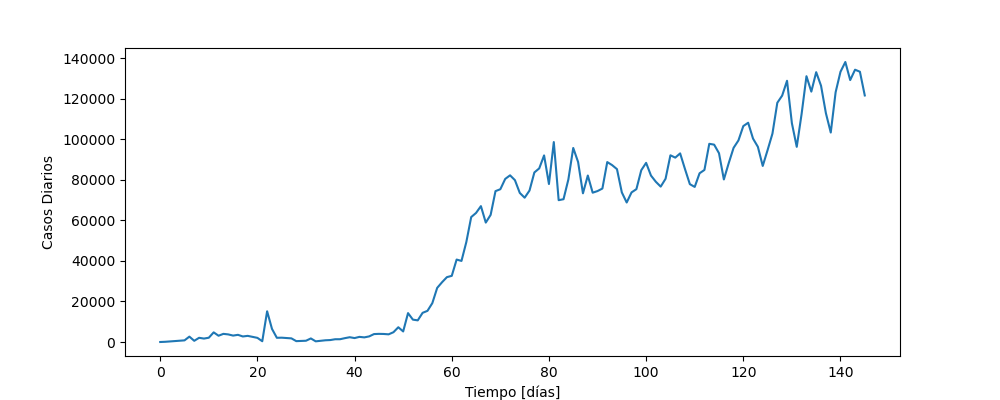

In [10]:
daily_cases = cases_per_day(df_confirm)

fig, ax = plt.subplots(figsize=(10, 4), facecolor='w')
ax.set_xlabel('Tiempo [días]')
ax.set_ylabel('Casos Diarios')
ax.plot(daily_cases)


<IPython.core.display.Javascript object>


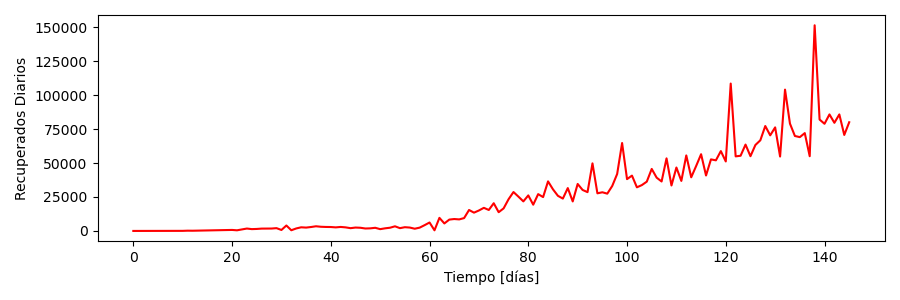

In [11]:
daily_recovered = cases_per_day(df_recovered)

fig2, ax2 = plt.subplots(figsize=(9, 3), tight_layout=True, facecolor='w')

ax2.set_xlabel('Tiempo [días]')
ax2.set_ylabel('Recuperados Diarios')

ax2.plot(daily_recovered, c='red')

<IPython.core.display.Javascript object>


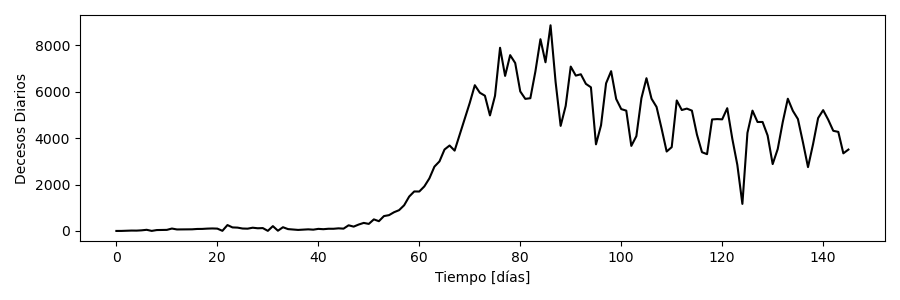

In [12]:
daily_deaths = cases_per_day(df_deaths)

fig3, ax3 = plt.subplots(figsize=(9, 3), tight_layout=True, facecolor='w')

ax3.set_xlabel('Tiempo [días]')
ax3.set_ylabel('Decesos Diarios')

ax3.plot(daily_deaths, c='black')

Encuentre y muestre los nombres y los valores de los 5 paises que a la fecha tienen
- La mayor tasa de incidencia (confirmados por 100.000 dividido población)
- La menor tasa de incidencia 
- La mayor tasa de recuperación (recuperados por 100.000 dividido población)
- La menor tasa de recuperación 
- La mayor tasa de mortalidad (decesos por 100.000 divido población)
- La menor tasa de mortalidad 

¿En qué lugar se encuentra Chile con respecto a cada una de estas métricas? ¿A qué paises se parece más? Discuta y comente sobre sus hallazgos

In [13]:
#Retorna un vector con la tasa de incidencia, recuperacion o mortalidad dependiendo del dataframe
def incidencia (df):
    return (df.iloc[:, -1] * 100000/df.iloc[:, 0])


#Imprime los primeros 5 menores y mayores de cada dataframe

def mayores_menores(df):
    display("Los mayores son: ")
    display(df.sort_values(axis=0,ascending=False).head(5))
    display("Los menores son: ")
    display(df.sort_values(axis=0,ascending=False).tail(5))

In [14]:
display("------Incidencia en confirmados------")
mayores_menores(incidencia(df_confirm))

display("------Incidencia en Muertos------")
mayores_menores(incidencia(df_deaths))

display("------Incidencia en Recuperados------")
mayores_menores(incidencia(df_recovered))

'------Incidencia en confirmados------'

'Los mayores son: '

Qatar         2858.907348
San Marino    2046.171536
Holy See      1498.127341
Bahrain       1157.921604
Andorra       1105.644744
dtype: float64

'Los menores son: '

Angola              0.453365
Vietnam             0.343762
Laos                0.261935
Lesotho             0.187021
Papua New Guinea    0.089771
dtype: float64

'------Incidencia en Muertos------'

'Los mayores son: '

Country/Region
San Marino        123.831707
Belgium            83.449365
Andorra            67.322631
United Kingdom     62.013654
Spain              58.043461
dtype: float64

'Los menores son: '

Country/Region
Timor-Leste    0.0
Saint Lucia    0.0
Dominica       0.0
Cambodia       0.0
Seychelles     0.0
dtype: float64

'------Incidencia en Recuperados------'

'Los mayores son: '

Country/Region
Qatar         2105.978498
San Marino    1739.540643
Holy See      1498.127341
Andorra       1021.491455
Bahrain        821.139516
dtype: float64

'Los menores son: '

Country/Region
Haiti               0.211008
Angola              0.196050
Lesotho             0.093510
Papua New Guinea    0.089771
Sweden              0.000000
dtype: float64

## Análisis comparativo (2.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib`

- La interfaz debe incluir dos controles para escoger dos paises entre los paises pertenecientes a la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos)
- La interfaz debe mostrar tres gráficos con la evolución temporal de casos confirmados, recuperados y decesos en ambos paises 
- La interfaz debe tener un control que permita escoger entre valores totales acumulados, valores totales diarios y tasas por 100.000 habitantes


En base a su interfaz estudie el caso de Chile contra dos paises de la OCDE seleccionados por usted y comente sobre lo que observa

In [15]:
import ipywidgets as widgets

OCDE=['Germany', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Spain', 'US','France', 'Colombia',
      'Greece', 'Ireland', 'Iceland', 'Italy', 'Luxembourg', 'Norway','Netherlands',
      'Portugal', 'United Kingdom', 'Sweden', 'Switzerland', 'Turkey','Japan', 'Finland',
      'Australia', 'New Zealand', 'Mexico', 'Czech Republic', 'Korea', 'Hungary', 'Poland',
      'Slovak Republic', 'Chile', 'Israel', 'Slovenia', 'Estonia', 'Latvia', 'Lithuania']

OCDE.sort()

In [16]:
#Retorna el total de casos del país 'p' para el dataframe 'df'
def country_total(p, df):
    return df.loc[p][1:]


#Retorna la tasa por 100.000 habitantes
def country_per_100(p, df):
    tasa_100 = []
    for i in range (1, df.loc[p][1:].shape[0]):
        tasa_100.append((df.loc[p][i] / df.loc[p][0]) * 100000)
        
    return np.array(tasa_100)


#Retorna la cantidad de casos diarios para un país
def country_per_day(p, df):
    casos = [0]
    for i in range (2, df.loc[p][1:].shape[0] - 1):
        casos.append(df.loc[p][i] - df.loc[p][i - 1])

    return np.array(casos)


def graficar(axis, data_p1, data_p2, p1, p2, escala, titulo, tipo_dato):
    axis.clear()
    axis.set_yscale(escala)
    axis.plot(data_p1, label=p1)
    axis.plot(data_p2, label=p2)
    axis.set_xlabel('Tiempo')
    axis.set_ylabel(tipo_dato)
    axis.set_title(titulo)
    axis.legend()

In [17]:
opciones={'Totales Acumulados': country_total,
          'Totales Diarios': country_per_day,
          'Tasas por 100.000 habitantes': country_per_100}

def plot_paises(P1, P2, escala, tipo_dato):

    data_p1_confirm = opciones[tipo_dato](P1, df_confirm)
    data_p2_confirm = opciones[tipo_dato](P2, df_confirm)
    
    data_p1_recup = opciones[tipo_dato](P1, df_recovered)
    data_p2_recup = opciones[tipo_dato](P2, df_recovered)
    
    data_p1_muert = opciones[tipo_dato](P1, df_deaths)
    data_p2_muert = opciones[tipo_dato](P2, df_deaths)      

    #Graficar confirmados
    graficar(ax_confirm, data_p1_confirm, data_p2_confirm, P1, P2, escala, 'Confirmados', tipo_dato)

    #Graficar recuperados
    graficar(ax_recup, data_p1_recup, data_p2_recup, P1, P2, escala, 'Recuperados', tipo_dato)

    #Graficar muertos
    graficar(ax_muert, data_p1_muert, data_p2_muert, P1, P2, escala, 'Muertos', tipo_dato)

<IPython.core.display.Javascript object>


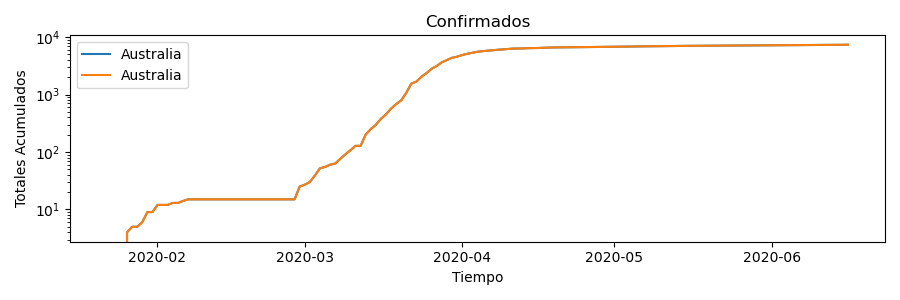

<IPython.core.display.Javascript object>


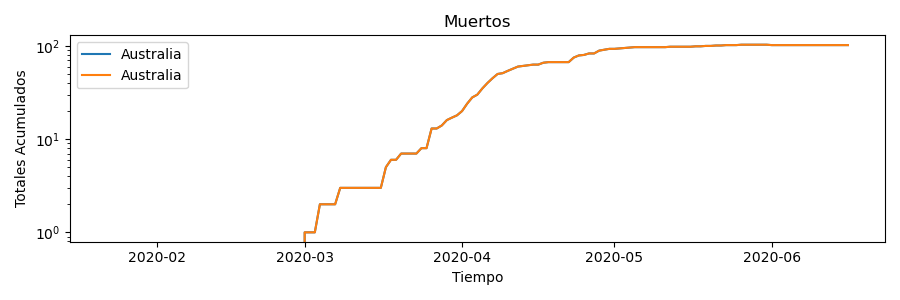

<IPython.core.display.Javascript object>


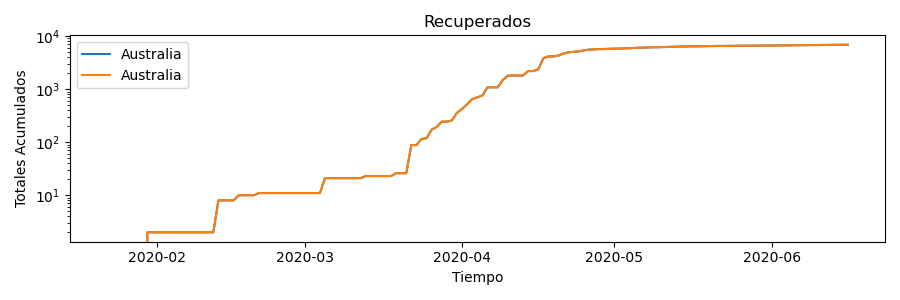

In [18]:
fig_confirm, ax_confirm = plt.subplots(figsize=(9, 3), tight_layout=True)
fig_muert, ax_muert = plt.subplots(figsize=(9, 3), tight_layout=True)
fig_recup, ax_recup = plt.subplots(figsize=(9, 3), tight_layout=True)

P_1 = widgets.Dropdown(options=OCDE,
                       description='País 1:',
                       disabled=False)

P_2 = widgets.Dropdown(options=OCDE,
                       description='País 2:',
                       disabled=False)

scale = widgets.Dropdown(options=['log','linear'],
                         description='Escala:',
                         disabled=False)

data = widgets.Dropdown(options=['Totales Acumulados',
                                 'Totales Diarios',
                                 'Tasas por 100.000 habitantes'
                                ],
                        description='Datos:',
                        disabled=False,)


* Para poder comparar a `Chile` con otros países, debemos usar la tasa cada 100.000 habitantes, dado que otros países pueden tener una poblcion que `Chile` y por ellos pueden llegar a tener mas casos confirmados, pero no por eso significa significa que Chile se 'encuentre mejor' que esos países, por ejemplo:

> Comparando a `Chile` con `Italia` podemos ver que `Italia` en el ultimo dia tiene una cifra similar de casos confirmados, sin embargo, viendo el gráfico de tasa por 100.000 habitantes, la cantidad que tiene `Chile` es casi el triple de la que tiene `Italia`, esto porque `Italia` tiene un poco más de l triple de poblacion que `Chile`.

> Ahora comparando a `Chile` con `Países Bajos`, que tiene una poblacion muy similar a la chilena ,podemos ver que `Chile` tiene una cantidad de contagios confirmados muy superior a la de `Países bajos` y por ende una mayor tasa de contagios por 100.000 habitantes.



* Con esto podemos concluir que a pesar de que la cifra de casos confirmados es una buena forma de comparar el impacto que ha tenido la enfermedad en los países, no es la mejor, puesto que si un país `X` tiene tiene una poblacion de 100.000 personas con una cantidad de 10.000 contagios confirmados y otro país `Y` tiene una poblacion de 10.000.000 de habitantes con una catindad de 20.000 contagios, no podemos decir que al país `Y` le esta impactando mas el virus por el simple hecho de tener una mayor cifra de contagios, pero si podemos afirmar que el país `X` se ha visto más afectado dado que es mucho más probable que una persona de este país pueda contraer el virus y por ende es más probable que esta persona fallezca por el hecho de que los servicios de salud se encuentre colapsados.

In [19]:
widgets.interact(plot_paises,P1=P_1,P2=P_2,escala=scale,tipo_dato=data)

interactive(children=(Dropdown(description='País 1:', options=('Australia', 'Austria', 'Belgium', 'Canada', 'C…

<function __main__.plot_paises(P1, P2, escala, tipo_dato)>

## BONUS (Opcional)

Implemente una app web a partir de su interfaz desarrollada en el punto anterior en base a jupyter widgets usando [viola](https://github.com/voila-dashboards/voila) y [heroku](https://github.com/voila-dashboards/voila-heroku)

Escriba acá el link a su app web